                                               Optimization
                                           Lab 3: Newton method
                                          Alexandre Escolà Nixon

## 2.The exercise of lab 1

Function to be analyzed:

$f(x_{1},x_{2})=x_{1}^2(4-2.1x_{1}^2+\frac{1}{3}x_{1}^4)+x_{1}x_{2}+x_{2}^2(-4+4x_{2}^2)$

#### 2.1 Recover the experiments you performed in the previous lab. Indeed, take
an initial point $x_{0}$, quite far away from a minimum, and compute the
number of iterations that are needed to get to the minimum, i.e. k <
10􀀀5.

In [3]:
%pylab inline
import matplotlib.pyplot as plt
# This is general
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np


Populating the interactive namespace from numpy and matplotlib


Gradient descent in step 1 at (1.00 0.20)
Gradient descent in step 2 at (-0.80 0.67)
Gradient descent in step 3 at (-0.28 1.00)
Gradient descent in step 4 at (-0.02 -0.95)
Gradient descent in step 5 at (0.25 0.58)
Gradient descent in step 6 at (-0.06 0.74)
Gradient descent in step 7 at (-0.09 0.68)
Gradient descent in step 8 at (-0.09 0.74)
Gradient descent in step 9 at (-0.09 0.71)
Gradient descent in step 10 at (-0.09 0.71)
Gradient descent in step 11 at (-0.09 0.71)
Gradient descent in step 12 at (-0.09 0.71)
Gradient descent in step 13 at (-0.09 0.71)
Gradient descent in step 14 at (-0.09 0.71)
Gradient descent in step 15 at (-0.09 0.71)
Gradient descent in step 16 at (-0.09 0.71)


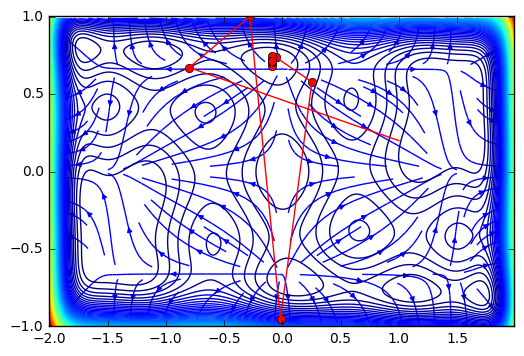

Number of iterations to get to the minimum: 17


In [5]:
from numpy.linalg import norm
X = np.arange(-2, 2, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + (X*Y)+(Y**2)*(-4+4*Y**2)

def gradx(X,Y):
    gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
    return gradx
def grady(X,Y):
    grady=16*(Y**3)-(8*Y)+X
    return grady
def grad (X,Y):
    grad=gradx(X,Y)**2+grady(X,Y)**2
    return grad

fig = plt.figure()
plt.contour(X,Y,grad(X,Y),100)
plt.streamplot(X, Y, gradx(X,X), grady(Y,Y))

alpha=1
iterations=100

# Initial points
X_init=1
Y_init=0.2

X=X_init
Y=Y_init
x=[];y=[];j=1
gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
grady=16*(Y**3)-(8*Y)+X
grad=np.array([[gradx,grady]]).T

for i in range(iterations):
    
    # If true the minimum has been reached
    if alpha<1e-5:
        break
        
    X_tmp=X-alpha*gradx
    Y_tmp=Y-alpha*grady
    
    Z_tmp = (X_tmp**2)*(4-2.1*(X_tmp**2)+(1.0/3)*X_tmp**4) + (X_tmp*Y_tmp)+(Y_tmp**2)*(-4+4*Y_tmp**2)
    Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + (X*Y)+(Y**2)*(-4+4*Y**2)
    
    # Backtracking: Does the update reduce the value of the function?
    if Z_tmp<Z: 
        print "Gradient descent in step %d at (%.2f %.2f)" %(j, X, Y)
        X=X_tmp
        Y=Y_tmp
        gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
        grady=16*(Y**3)-(8*Y)+X
        grad=np.array([[gradx],[grady]])
        alpha=1
        j+=1
    else:
        alpha=alpha/2.0
        continue
    x=np.append(x,X)
    y=np.append(y,Y)
    plt.plot(X,Y, 'ro')    
plt.plot(np.append(X_init,x),np.append(Y_init,y),'red')  
plt.show()

print "Number of iterations to get to the minimum: %d" %j

As it can be seen one of the local minimas has been found in 17 steps. Now the Newton algorithm will be tested using the same initial points, so bot methods can be fairly compared.

#### 2.2 We are now going to focus on the Newton method

As stated in the exercise proposal, if the Hessian is not positive definite the obtained vector d^{k} is not necessarily a descent direction.


A matrix i said to be positive definite if it is symmetric and all its eigenvalues are positive. 

Given that the second derivatives of the function are continuous (in a neighbourhood D), the Hessian is a symmetric matrix throughout D, as stated in Schwarz's theorem. Taking this into account, at each iteration it must be checked whether the eigenvalues of the Hessian are positive or not to ascertain that the descent direction will be correct. If they are positive the matrix is indeed positive definited. This method can be computationally very expensive for large matrices, and other more efficient methods exist fore those cases.

If the matrix is PD the Newton mathod is applied, otherwise the gradient descent method.

The backtracking algorithm to compute a good value for $\alpha^{k}$ is used.

Gradient descent in step 1 at (1.00 0.20)
Gradient descent in step 2 at (-0.80 0.67)
Newton raphson in step 3 at (-0.28 1.00)
Newton raphson in step 4 at (-0.07 0.80)
Newton raphson in step 5 at (-0.09 0.73)
Newton raphson in step 6 at (-0.09 0.71)
Newton raphson in step 7 at (-0.09 0.71)


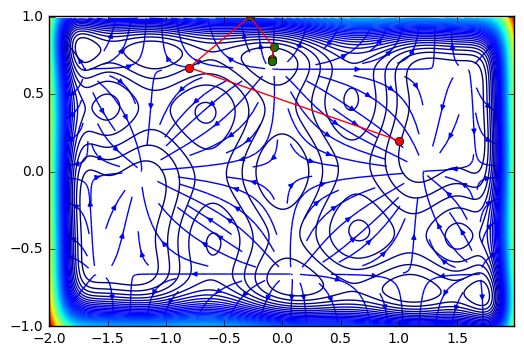

In [7]:
X = np.arange(-2, 2, 0.01)
Y = np.arange(-1, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + (X*Y)+(Y**2)*(-4+4*Y**2)

def gradx(X,Y):
    gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
    return gradx
def grady(X,Y):
    grady=16*(Y**3)-(8*Y)+X
    return grady
def grad (X,Y):
    grad=gradx(X,Y)**2+grady(X,Y)**2
    return grad

fig = plt.figure()
plt.contour(X,Y,grad(X,Y),100)
plt.streamplot(X, Y, gradx(X,Y), grady(Y,Y))

alpha=1
iterations=1000

# Initial points
X_init=1
Y_init=0.2

X=X_init
Y=Y_init
x=[];y=[];
x_nwt=np.zeros(iterations);x_grad=np.zeros(iterations)
y_nwt=np.zeros(iterations);y_grad=np.zeros(iterations)
iter_newton=0
iter_gradient=0
gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
grady=16*(Y**3)-(8*Y)+X
grad=np.array([[gradx,grady]]).T
j=1
# Function to check if a matrix is positive definite
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

for i in range(iterations):
    
    if alpha<1e-5:
        break
        
    dfxx=10*(X**4)-25.2*(X**2)+8
    dfyy=(48*Y**2)-8
    dfxy=1
    dfyx=dfxy
    hessian=np.array([[dfxx, dfxy], [dfyx, dfyy]])

    # If the Hessian is PD we use Newton, otherwise gradient descent
    
    # NEWTON METHOD
    if is_pos_def(hessian)==True :
        iter_newton+=1
        
        # Solving for the next step 
        d=np.linalg.solve(hessian, -grad)
        
        X_new=np.ndarray.item(X+alpha*d[0])
        Y_new=np.ndarray.item(Y+alpha*d[1])
        
        #Function at actual point and next step point - Used for the backtracking algorithm
        Z_updated = (X_new**2)*(4-2.1*(X_new**2)+(1.0/3)*X_new**4) + (X_new*Y_new)+(Y_new**2)*(-4+4*Y_new**2)
        Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + (X*Y)+(Y**2)*(-4+4*Y**2)
        
        # Backtracking: Does the update reduce the value of the function?
        if Z_updated<Z: 
            print "Newton raphson in step %d at (%.2f %.2f)" %(j, X, Y)
            j+=1
            plt.plot(X,Y, 'go')
            X=X_new
            Y=Y_new
            gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
            grady=16*(Y**3)-(8*Y)+X
            grad=np.array([[gradx],[grady]])
            alpha=1
        else:
            alpha=alpha/2.0
            continue

    #GRADIENT DESCENT
    else:
        iter_gradient+=1
        X_new=X-alpha*gradx
        Y_new=Y-alpha*grady
        
        Z_updated = (X_new**2)*(4-2.1*(X_new**2)+(1.0/3)*X_new**4) + (X_new*Y_new)+(Y_new**2)*(-4+4*Y_new**2)
        Z = (X**2)*(4-2.1*(X**2)+(1.0/3)*X**4) + (X*Y)+(Y**2)*(-4+4*Y**2)
        
        # Backtracking: Does the update reduce the value of the function?
        if Z_updated<Z: 
            print "Gradient descent in step %d at (%.2f %.2f)" %(j, X, Y)
            j+=1
            plt.plot(X,Y, 'ro')
            
            #Update of the position 
            X=X_new
            Y=Y_new
            
            gradx=2*(X**5)-8.4*(X**3)+(8*X)+Y
            grady=16*(Y**3)-(8*Y)+X
            
            #Gradient. Used to calculate the next Newton step
            grad=np.array([[gradx],[grady]])
            
            alpha=1
        else:
            alpha=alpha/2.0
            continue       
    x=np.append(x,X)
    y=np.append(y,Y)

plt.plot(np.append(X_init,x),np.append(Y_init,y),'red')    
plt.show()


 As it can be seen the minimum has been found in only 7 steps. The two first ones using the gradient descent algorithm, and the remaining 5 with the Newton method. The method specified in the exercise has been used, this is, the points at which the Gradient descent has been used appear in red, and where the Newton method has been used in greeen.
 
#### 2.3 Comparisson between methods
 
Comparing both plots, it is interesting to see that at the first point at which the Newton method is implemented (-0.28,1.00), the gradient of the function is relatively high compared to the rest of the function, specifically of (0.2152,1.7835), and therefore in the first example, when gradient descent is used in this same step, the next point appears on the other end of the function, not taking into account that there is a minimum nearby, whereas with the Newton method the next step will be close to the nearby local minimum, needing fewer steps to reach it.

This will be analyzed in more detail in the following section, but the main reason behind the fact that the Newton method is more effective fingind the minimas is that it takes into account the second order information of the function, or in more detail, the intuition behind the method is that it minimizes a a quadratic Taylor approximation of the function at a point, which is used in the Newton direction, or Newton step. This will provide a much closer approximation of a minima at each step than with the gradient descent algorithm.

## 3.The Rosenbrock function

In this section the performance of the algorithms is tested with a Rosenbrock function:

$f(x_{1},x_{2})=(a-x_{1})^{2}+b·(x_{2}-x_{1}^{2})^{2}$

The Rosenbrock function of thwo variables a=1 and b=100


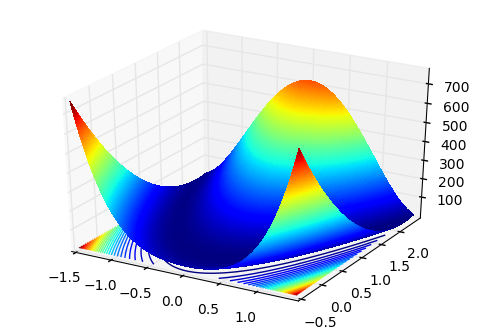

In [122]:
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-0.5, 2.5, 0.01)
X, Y = np.meshgrid(X, Y)
a=1;b=100
Z = (a-X)**2+b*(Y-X**2)**2

def gradx(X,Y):
    gradx=2*X-2*a+4*b*X**3-4*b*Y*X
    return gradx
def grady(X,Y):
    grady=2*b*Y-2*b*X**2
    return grady
def grad (X,Y):
    grad=gradx(X,Y)**2+grady(X,Y)**2
    return grad

print 'The Rosenbrock function of thwo variables a=1 and b=100'
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.jet, linewidth=0, antialiased=False)
plt.contour(X,Y,Z,30,zdir='z',offset=0)
plt.show()

Firstly the gradient of the function is computed by hand:

\begin{equation}
\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_{1}}\\ \frac{\partial f}{\partial x_{2}} \end{bmatrix}
= \begin{bmatrix} 4bx_1^3-4bx_1x_2+2x_1-2a \\ -2bx_1^2+2bx_2 \end{bmatrix}
\end{equation}



And the Hessian is also computed to solve for the descent direction and to check if the descent direction is correct depending on whether it is positive definite or not.

\begin{equation}
H=
\begin{bmatrix}
\frac{\partial^2 f}{\partial x_{1}^2} & \frac{\partial f}{\partial x_{1} \partial x_{2}} \\ 
\frac{\partial f}{\partial x_{2} \partial x_{1}} & \frac{\partial^2 f}{\partial x_{2}^2}
\end{bmatrix}
=
\begin{bmatrix}
12bx_1^2-4bx_2+2 & -4bx_1\\ 
-4bx_1 & 2b
\end{bmatrix}
\end{equation}

Here the minimum is found with the gradient descent method:

Here the minimum is found in 4206 steps, with a precision of (0.00393 , 0.00786)


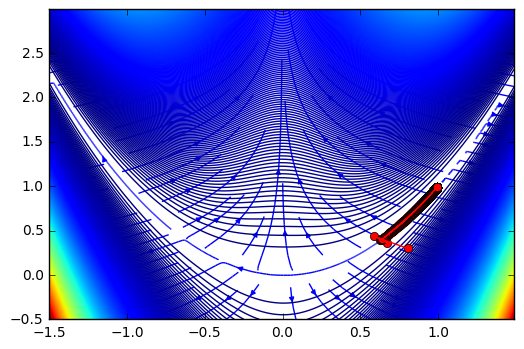

In [9]:
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-0.5, 3, 0.01)
X, Y = np.meshgrid(X, Y)
a=1;b=100
Z = (a-X)**2+b*(Y-X**2)**2

def gradx(X,Y):
    gradx=2*X-2*a+4*b*X**3-4*b*Y*X
    return gradx
def grady(X,Y):
    grady=2*b*Y-2*b*X**2
    return grady
def grad (X,Y):
    grad=gradx(X,Y)**2+grady(X,Y)**2
    return grad
fig = plt.figure()
plt.contour(X,Y,grad(X,Y),1000)
plt.streamplot(X, Y, gradx(X,Y), grady(X,Y))

alpha=1
iterations=50000
X=0.4
Y=0.8
x=[];y=[];j=1
gradx=2*X-2*a+4*b*X**3-4*b*Y*X
grady=2*b*Y-2*b*X**2

for i in range(iterations):
    X_new=X-alpha*gradx
    Y_new=Y-alpha*grady
    
    Z_updated= (a-X_new)**2+b*(Y_new-X_new**2)**2
    Z = (a-X)**2+b*(Y-X**2)**2
    
    # Backtracking: Does the update reduce the value of the function?
    if Z_updated<Z: 
        j+=1
        # Second condition, end loop if the norm 2 is smaller than 1e-5
        if np.sqrt((X-X_new)**2+(Y-Y_new)**2)< 1e-5:
            break
        X=X_new
        Y=Y_new
        gradx=2*X-2*a+4*b*X**3-4*b*Y*X
        grady=2*b*Y-2*b*X**2
        grad=np.array([[gradx],[grady]])
        alpha=1
        
    else:
        alpha=alpha/2.0
        continue
    plt.plot(X,Y, 'ro')
    x=np.append(x,X)
    y=np.append(y,Y)
print "Here the minimum is found in %d steps, with a precision of (%.5f , %.5f)" %(j,abs(1-X),abs(1-Y))
plt.plot(x,y,'red')
plt.show()

As is can be seen, in order to find the minimum of the function, a lot of iterations have to be computed given that, as mentioned in the exercise statement, the gradient descent continuously jumps from one side to the other side of the valley without taking into account the shape of the it. The reason behind this is that the valley of this function is very narrow, therefore the region contained by the contour line of the valley  from side to side is also very narrow, and given that the gradient at a point is orthogonal to the contour line going thourgh that point, the optimization is zig-zagging slowly with small stepsizes towards the minimum.

Hereunder the Newton method is implemented in order to find the minimum of this same function:

Gradient descent in step 0 at (0.40 0.80)
Newton method in step 1 at (0.80 0.30)
Newton method in step 2 at (0.81 0.65)
Newton method in step 3 at (0.90 0.81)
Newton method in step 4 at (0.94 0.88)
Newton method in step 5 at (0.99 0.97)
Newton method in step 6 at (1.00 0.99)
Newton method in step 7 at (1.00 1.00)
Newton method in step 8 at (1.00 1.00)
Newton method in step 9 at (1.00 1.00)
Newton method in step 10 at (1.00 1.00)


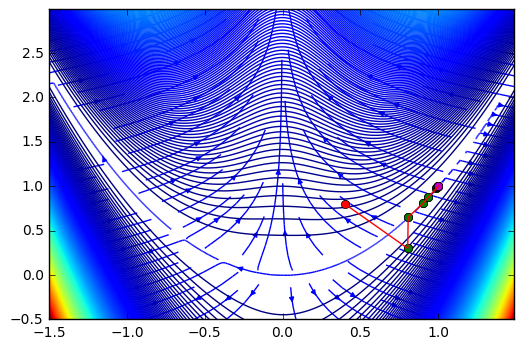

In [13]:
a=1
b=100
X = np.arange(-1.5, 1.5, 0.01)
Y = np.arange(-0.5, 3, 0.01)
X, Y = np.meshgrid(X, Y)
Z = (a-X)**2+b*(Y-X**2)**2

def gradx(X,Y):
    gradx=2*X-2*a+4*b*X**3-4*b*Y*X
    return gradx
def grady(X,Y):
    grady=2*b*Y-2*b*X**2
    return grady
def grad (X,Y):
    grad=gradx(X,Y)**2+grady(X,Y)**2
    return grad

fig = plt.figure()
plt.contour(X,Y,grad(X,Y),500)
plt.streamplot(X, Y, gradx(X,Y), grady(X,Y))

alpha=1
iterations=2000
X_init=0.4
Y_init=0.8
X=X_init
Y=Y_init
x=[];y=[];j=0
iter_newton=0
iter_gradient=0
gradx=2*X-2*a+4*b*X**3-4*b*Y*X
grady=2*b*Y-2*b*X**2
grad=np.array([[gradx,grady]]).T

# Function to check if a matrix is positive definite
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > 0)

for i in range(iterations):
    # Condition over alpha
    if alpha<1e-5:
        break
        
    dfxx=2+12*b*X**2-4*b*Y
    dfxy=-4*b*X
    dfyx=dfxy
    dfyy=2*b
    hessian=np.array([[dfxx, dfxy], [dfyx, dfyy]])

    # If it is PD we use Newton, otherwise gradient descent
    # NEWTON
    if is_pos_def(hessian)==True :

        # Solving for the next step
        d=np.linalg.solve(hessian, -grad)
        
        X_new=np.ndarray.item(X+alpha*d[0])
        Y_new=np.ndarray.item(Y+alpha*d[1])
        
        Z_updated = (a-X_new)**2+b*(Y_new-X_new**2)**2
        Z = (a-X)**2+b*(Y-X**2)**2
        
        # Backtracking: Does the update reduce the value of the function?
        if Z_updated<Z: 
            print "Newton method in step %d at (%.2f %.2f)" %(j, X, Y)
            j+=1
            plt.plot(X,Y, 'go')
            X=X_new
            Y=Y_new
            gradx=2*X-2*a+4*b*X**3-4*b*Y*X
            grady=2*b*Y-2*b*X**2
            grad=np.array([[gradx],[grady]])
            alpha=1
        else:
            alpha=alpha/2.0
            continue
    #GRADIENT DESCENT
    else:

        X_new=X-alpha*gradx
        Y_new=Y-alpha*grady
        
        Z_updated = (a-X_new)**2+b*(Y_new-X_new**2)**2
        Z = (a-X)**2+b*(Y-X**2)**2

        # Backtracking: Does the update reduce the value of the function?
        if Z_updated<Z:
            print "Gradient descent in step %d at (%.2f %.2f)" %(j, X, Y)
            j+=1
            plt.plot(X,Y, 'ro')
            X=X_new
            Y=Y_new
            gradx=2*X-2*a+4*b*X**3-4*b*Y*X
            grady=2*b*Y-2*b*X**2
            grad=np.array([[gradx],[grady]])
            alpha=1
        else:
            alpha=alpha/2.0
            continue
    x=np.append(x,X)
    y=np.append(y,Y)
    plt.plot(X,Y, 'o')
    
plt.plot(np.append(X_init,x),np.append(Y_init,y),'red')       
plt.show()

In all simulations performed once the gradient descent algorithm leads to a point in the valley, the Newton method is used to converge to the global minimum in a few steps.

As it can be seen, the Newton method requires much less iterations to get to the minimum. 
The reason behind this is that second order information, this is, the Hessian of the objective function, allows to take into account the curvature, and to take steps sized the inverse of the steepness.

Newton's method however does have a dissadvantage, and it is that it involves to solve the system of equations in order to compute each step, but for these sort of functions it is clearly more efficient.

However as proved it is much more efficient in these kind of long valley functions.